In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,roc_auc_score,roc_curve,precision_recall_curve
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score,KFold,cross_val_predict,StratifiedKFold,GridSearchCV
from xgboost import XGBClassifier
from xgboost import plot_importance
import pickle
import matplotlib.pyplot as pyplot

In [3]:
df=pd.read_csv('D:\\Edureka\\FInalProject\\XGBoost\\auto.csv')
df=df.replace(-1,np.nan)

In [4]:
def handleMIssingVals(df2):
  df2['ps_ind_02_cat'] = df2['ps_ind_02_cat'].fillna(1.0)
  df2['ps_ind_04_cat']=df2['ps_ind_04_cat'].fillna(0.0)
  df2['ps_ind_05_cat']=df2['ps_ind_05_cat'].fillna(7.0)
  df2['ps_reg_03']=df2['ps_reg_03'].fillna(df2['ps_reg_03'].mean())
  df2['ps_car_01_cat']=df2['ps_car_01_cat'].fillna(11.0)
  df2['ps_car_05_cat']=df2['ps_car_05_cat'].fillna(2.0)
  df2['ps_car_07_cat']=df2['ps_car_07_cat'].fillna(1.0)
  df2['ps_car_09_cat']=df2['ps_car_09_cat'].fillna(2.0)
  df2['ps_car_11']=df2['ps_car_11'].fillna(3.0)
  df2['ps_car_12']=df2['ps_car_12'].fillna(df2['ps_car_12'].mean())
  df2['ps_car_14']=df2['ps_car_14'].fillna(df2['ps_car_14'].mean())

In [5]:
handleMIssingVals(df)

In [6]:
target=df['target']

In [7]:
drop_cols=['id', 'ps_car_13' ,'ps_car_14' , 'ps_reg_03' , 'ps_ind_10_bin' , 'ps_ind_11_bin' , 'ps_ind_13_bin' ,'ps_ind_14' , 'ps_car_03_cat','target']
df.drop(drop_cols,axis=1,inplace=True)

In [8]:
cat_cols=df[['ps_ind_02_cat','ps_ind_04_cat','ps_ind_05_cat','ps_car_01_cat','ps_car_04_cat','ps_car_05_cat','ps_car_06_cat','ps_car_10_cat']]

In [9]:
for eachcol in cat_cols:
  dummies=pd.get_dummies(cat_cols[eachcol],prefix_sep='_',prefix=eachcol)
  df=df.join(dummies)
data_vars=df.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_cols]
df_final=df[to_keep]

In [10]:
X_train,X_test,Y_train,Y_test=train_test_split(df_final,target,test_size=0.3,random_state=2)

model = XGBClassifier(scale_pos_weight=10)

skfold=StratifiedKFold(n_splits=10,random_state=2)


roc_auc=cross_val_score(model,X_train,Y_train,scoring='roc_auc',cv=skfold) # after setting scale_pos_weight to 27

print(roc_auc)

[0.63280109 0.64246721 0.64928406 0.65120351 0.6331232  0.64161981
 0.63834732 0.63426045 0.63518893 0.62573243]


In [11]:
model.fit(X_train.values,Y_train.values)

pred_y=model.predict(X_test.values)

In [12]:
#np.unique(pred_y)

print('accuracy score ',accuracy_score(Y_test,pred_y))

print(confusion_matrix(Y_test,pred_y))

print(f1_score(Y_test,pred_y))

accuracy score  0.9524596223202886
[[169786   2274]
 [  6215    289]]
0.06374765633616411


In [13]:
print(classification_report(Y_test,pred_y))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98    172060
           1       0.11      0.04      0.06      6504

   micro avg       0.95      0.95      0.95    178564
   macro avg       0.54      0.52      0.52    178564
weighted avg       0.93      0.95      0.94    178564



In [15]:
y_probs=model.predict_proba(X_test.values)

In [16]:
y_probs

array([[0.78756475, 0.21243522],
       [0.5801133 , 0.41988674],
       [0.7864762 , 0.2135238 ],
       ...,
       [0.8226402 , 0.17735979],
       [0.82475185, 0.17524818],
       [0.89539623, 0.10460374]], dtype=float32)

In [26]:
y_probs_1=y_probs[:,1]

In [27]:
yprobs1=y_probs_1 > 0.5
yprobs1 = yprobs1 * 1
np.unique(yprobs1,return_counts=True)

(array([0, 1]), array([176001,   2563], dtype=int64))

In [20]:
np.unique(yprobs1,return_counts=True)

(array([0, 1]), array([129918,  48646], dtype=int64))

In [35]:
lr_precision, lr_recall, _=precision_recall_curve(Y_test,y_probs_1)

In [39]:
auc(lr_recall, lr_precision)

0.06332816088157696

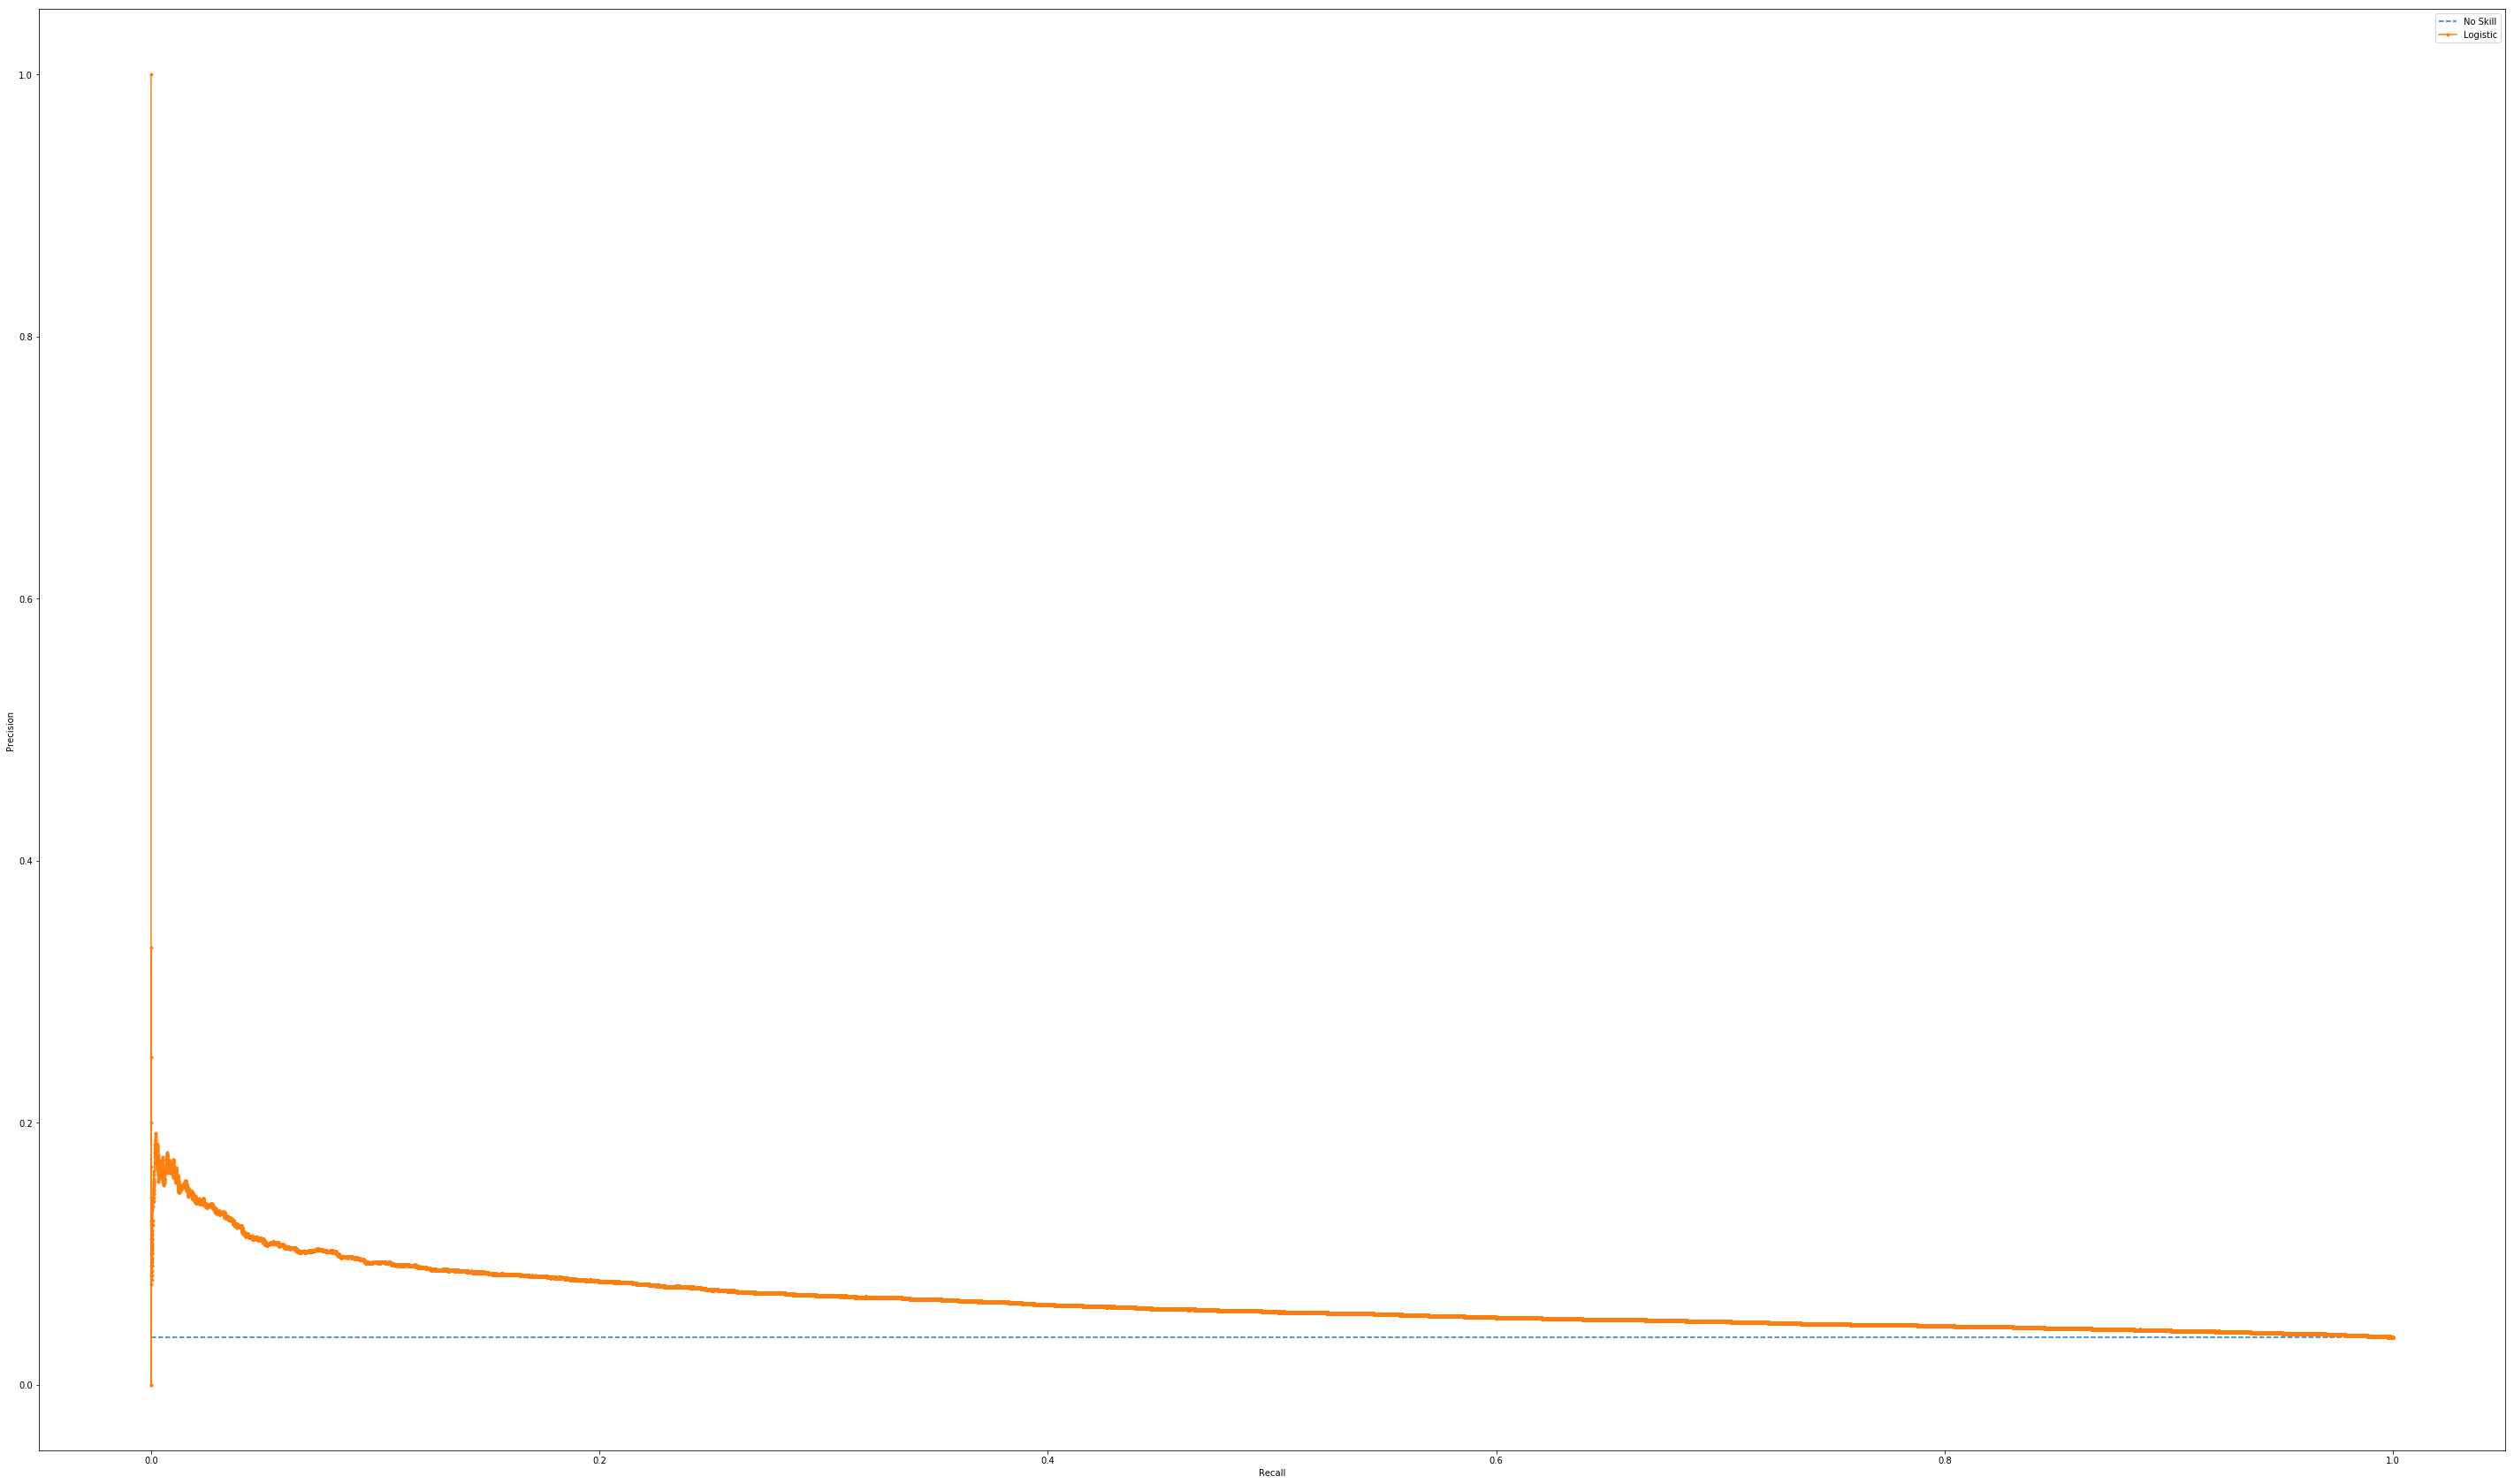

In [51]:
no_skill = len(Y_test[Y_test==1]) / len(Y_test)
pyplot.figure(figsize=(50,30))
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')

# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()